<a href="https://colab.research.google.com/github/ramboraj123/INSE6180/blob/main/Acetylcholinesterase_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery Comparing Regressors**


Comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2021-01-22 14:57:46--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2021-01-22 14:57:46--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_f

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(4695, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 95%|█████████▌| 40/42 [18:01<00:51, 25.97s/it]

[02:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [18:03<00:00, 25.79s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 90%|█████████ | 38/42 [18:57<03:05, 46.37s/it]

[03:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [18:59<00:00, 27.13s/it]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train
predictions_train.to_csv('training.csv')

In [ ]:
# Performance table of the test set (20% subset)
predictions_test
predictions_train.to_csv('testing.csv')

## **5. Data visualization of model performance**

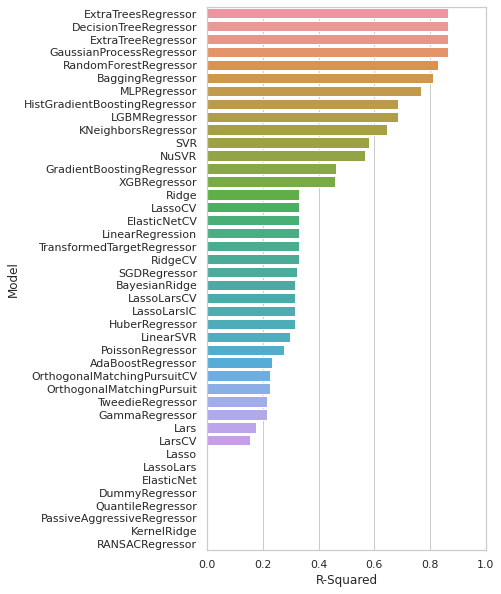

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('DataVisualizationofModelPerformance.jpeg')


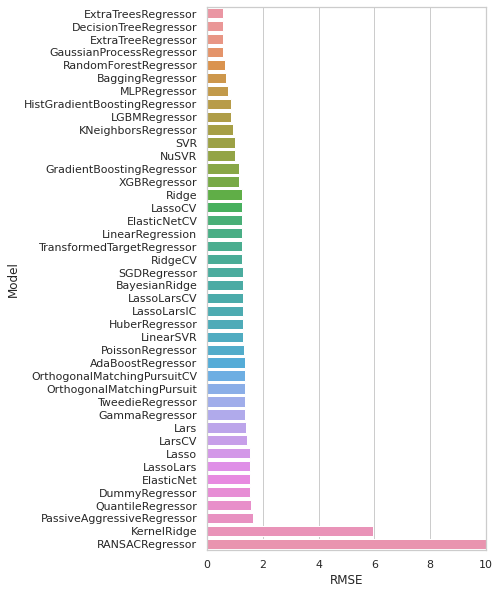

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('BarPlotRunTime.pdf')

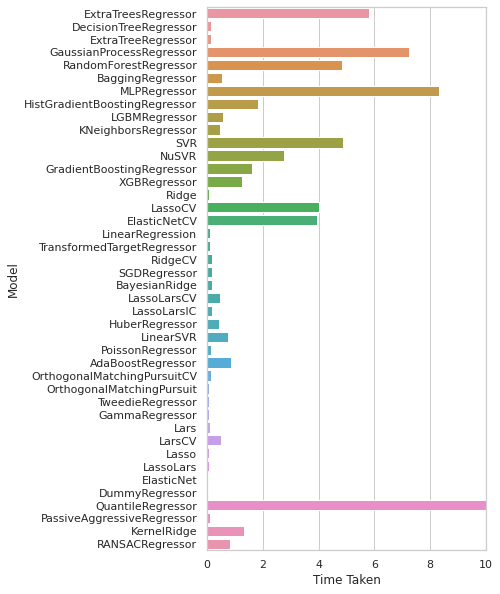

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('BarPlotCalculationTime.jpeg')